In [1]:
#Miguel Angel Martinez Moncada 1945469 Practica 3 Data Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Se lee el dataset preparado
df = pd.read_csv("Data Cleaning dataset-MAMM.csv")

#Se imprime el dataset
print(df)

      vendedor_1  vendedor_2   producto       fecha
0              5           5   CONSOLA9  05/05/2024
1              4           7   SMARTWAT  01/07/2012
2              4          11  CELULAA01  24/07/2010
3              5           9   AIRE2200  03/03/2016
4              5           4   SMARTWAT  30/06/2015
...          ...         ...        ...         ...
4995           2           8   LAPTOP15  21/05/2024
4996           4           6   LAPTOP15  19/08/2018
4997           7           6   CAMARAHD  02/05/2013
4998           6           4       TV42  10/07/2022
4999           3           9    DRONE99  30/09/2023

[5000 rows x 4 columns]


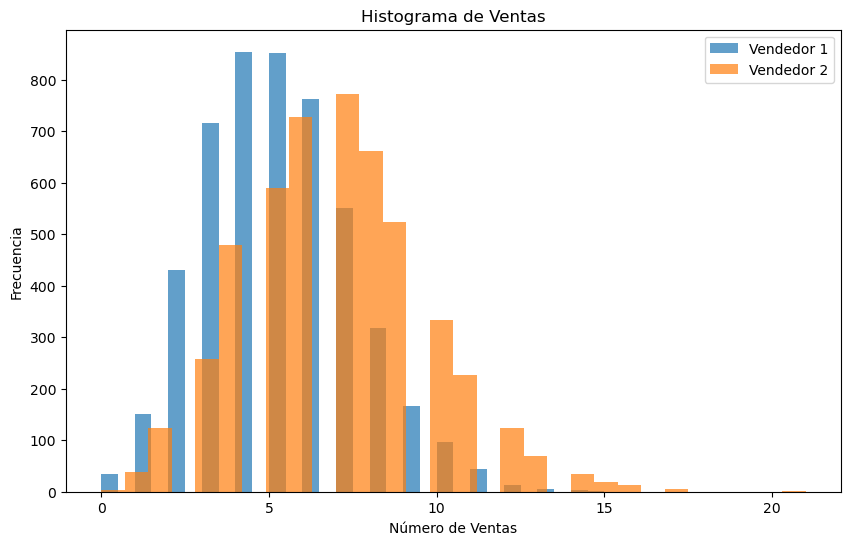

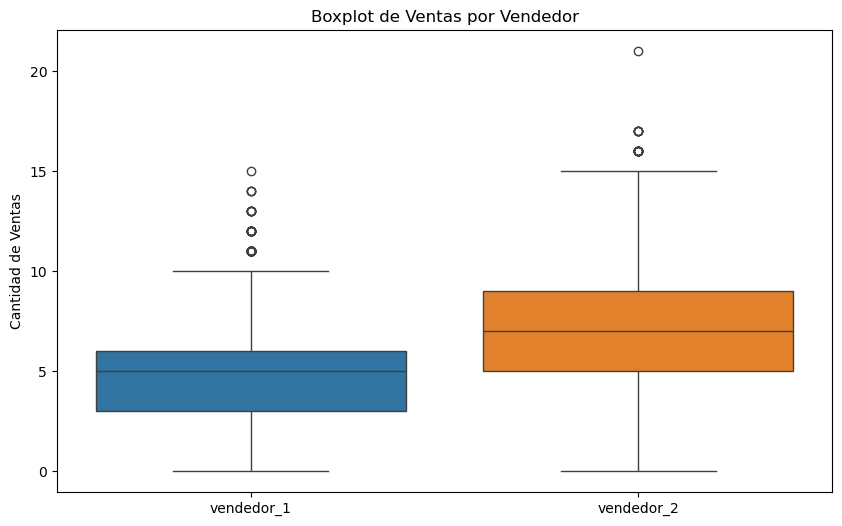

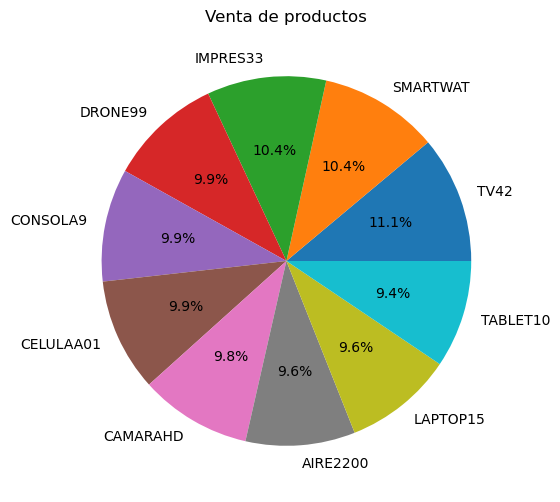

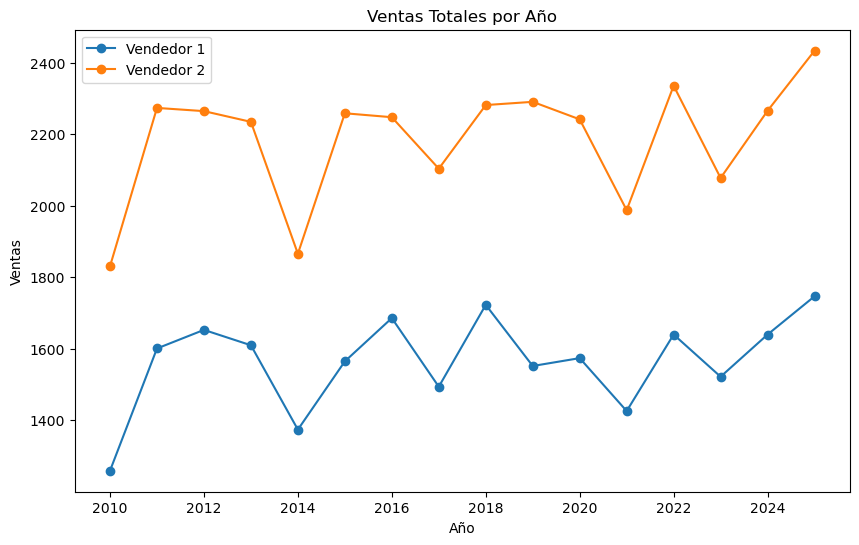

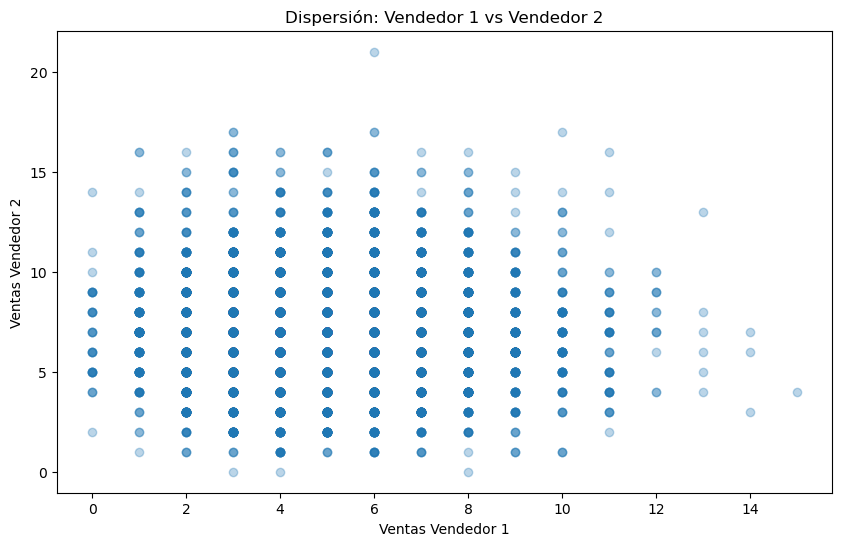

In [7]:
# Asegúrate de tener una columna 'fecha' que este ordenada en dd/mm/yyyy y obtener solo el año
df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True)
df['año'] = df['fecha'].dt.year

# Tipos de gráficos a generar
plot_types = ['hist', 'box', 'pie', 'line', 'scatter']

for plot_type in plot_types:
    plt.figure(figsize=(10, 6))

    if plot_type == 'hist':
        plt.hist(df['vendedor_1'], bins=30, alpha=0.7, label='Vendedor 1')
        plt.hist(df['vendedor_2'], bins=30, alpha=0.7, label='Vendedor 2')
        plt.title('Histograma de Ventas')
        plt.xlabel('Número de Ventas')
        plt.ylabel('Frecuencia')
        plt.legend()

    elif plot_type == 'box':
        sns.boxplot(data=df[['vendedor_1', 'vendedor_2']])
        plt.title('Boxplot de Ventas por Vendedor')
        plt.ylabel('Cantidad de Ventas')

    elif plot_type == 'pie':
        producto_counts = df['producto'].value_counts()
        plt.pie(producto_counts, labels=producto_counts.index, autopct='%1.1f%%')
        plt.title('Venta de productos')

    elif plot_type == 'line':
        ventas_por_año = df.groupby('año')[['vendedor_1', 'vendedor_2']].sum()
        plt.plot(ventas_por_año.index, ventas_por_año['vendedor_1'], marker='o', label='Vendedor 1')
        plt.plot(ventas_por_año.index, ventas_por_año['vendedor_2'], marker='o', label='Vendedor 2')
        plt.title('Ventas Totales por Año')
        plt.xlabel('Año')
        plt.ylabel('Ventas')
        plt.legend()

    elif plot_type == 'scatter':
        plt.scatter(df['vendedor_1'], df['vendedor_2'], alpha=0.3)
        plt.title('Dispersión: Vendedor 1 vs Vendedor 2')
        plt.xlabel('Ventas Vendedor 1')
        plt.ylabel('Ventas Vendedor 2')

    plt.show()
